<a href="https://colab.research.google.com/github/Aman78695/Online-retail-customer-segmentation-clustering-analysis/blob/main/Copy_of_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn.linear_model import LogisticRegression
from sklearn .preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [199]:
df=pd.read_csv('/content/Online_Retail.xlsx - Online Retail.csv',parse_dates=['InvoiceDate'])

In [200]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [202]:
df.dropna(inplace=True)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [204]:
df['InvoiceNo'].astype('str')

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 406829, dtype: object

In [205]:
df['InvoiceNo'].sort_values(ascending=False).reset_index()

,index,InvoiceNo
0,541717,C581569
1,541716,C581569
2,541715,C581568
3,541541,C581499
4,540449,C581490
...,...,...
406824,3,536365
406825,1,536365
406826,5,536365
406827,6,536365


In [206]:
list(df.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [207]:
print(df['InvoiceNo'][0]=='C')

False


In [208]:
df['InvoiceNo'].sort_values(ascending=False)

541717    C581569
541716    C581569
541715    C581568
541541    C581499
540449    C581490
           ...   
3          536365
1          536365
5          536365
6          536365
0          536365
Name: InvoiceNo, Length: 406829, dtype: object

In [209]:
df=df[~df['InvoiceNo'].str.contains('C')]

In [210]:
df['InvoiceNo'].sort_values(ascending=False)

541908    581587
541901    581587
541895    581587
541896    581587
541897    581587
           ...  
3         536365
1         536365
5         536365
6         536365
0         536365
Name: InvoiceNo, Length: 397924, dtype: object

In [211]:
description_df=df['Description'].value_counts()

In [212]:
description_df=description_df.reset_index()

In [213]:
description_df

,index,Description
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397
...,...,...
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1


In [214]:
description_df.rename(columns={'index':'description_name'},inplace=True)
description_df.rename(columns={'Description':'count'},inplace=True)

In [215]:
description_df

,description_name,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397
...,...,...
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1


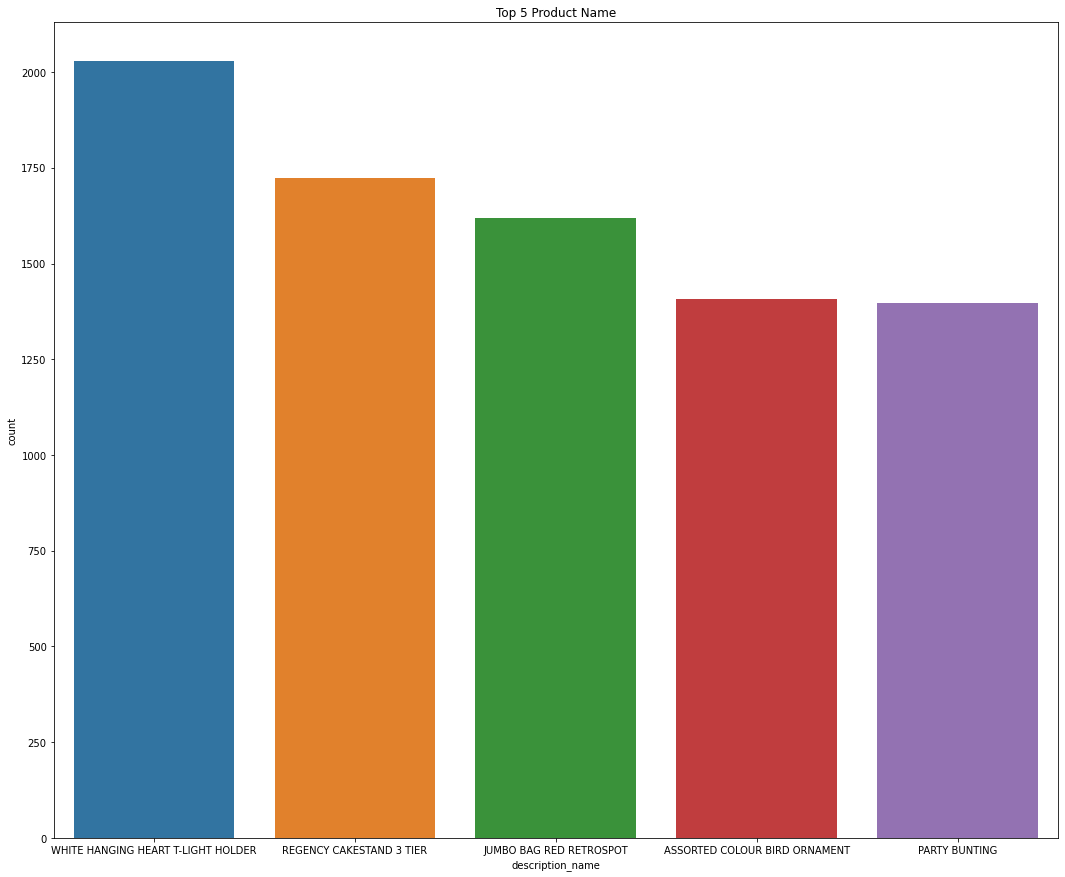

In [216]:
plt.figure(figsize=(18,15))
plt.title('Top 5 Product Name')
sns.barplot(x='description_name',y='count',data=description_df[0:5])

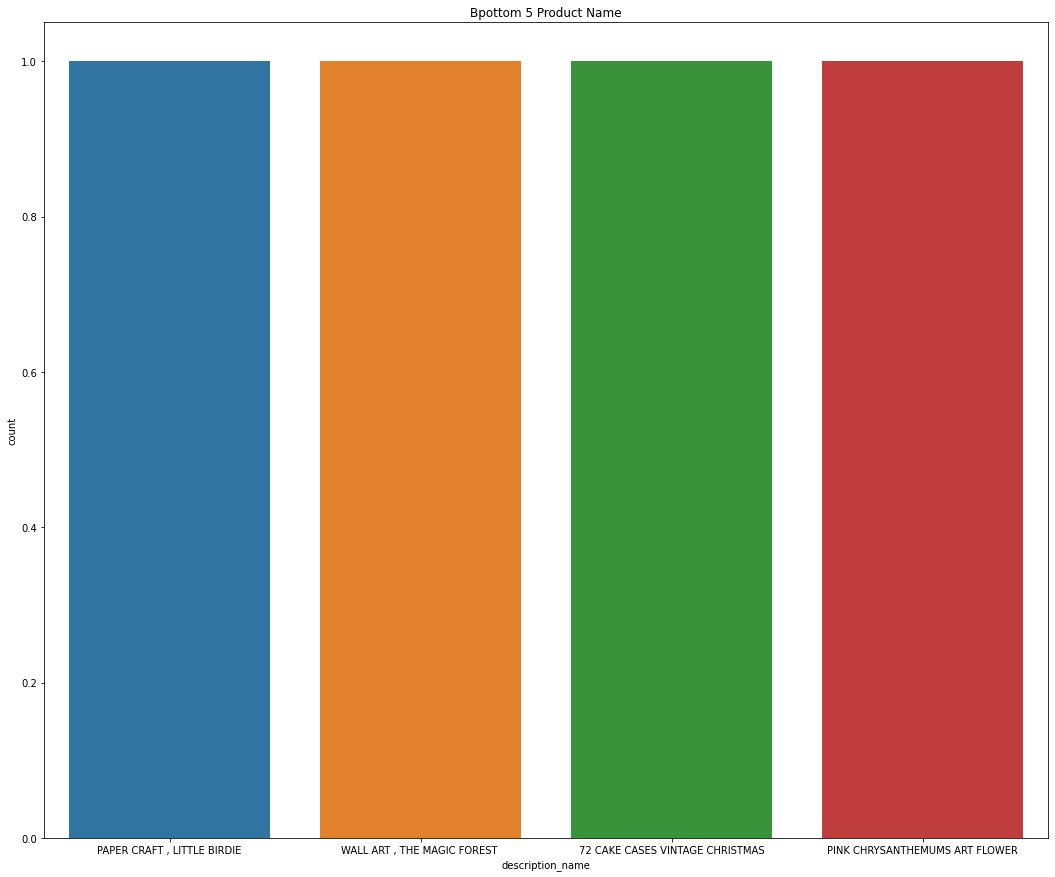

In [217]:
plt.figure(figsize=(18,15))
plt.title('Bpottom 5 Product Name')
sns.barplot(x='description_name',y='count',data=description_df[-1:-5:-1])

In [218]:
description_df[-1:-5:-1]

,description_name,count
3876,"PAPER CRAFT , LITTLE BIRDIE",1
3875,"WALL ART , THE MAGIC FOREST",1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1


In [219]:
stock_df=df['StockCode'].value_counts().reset_index()

In [220]:
stock_df.rename(columns={'index':'stock_code'},inplace=True)
stock_df.rename(columns={'StockCode':'count'},inplace=True)

In [221]:
stock_df

,stock_code,count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397
...,...,...
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1


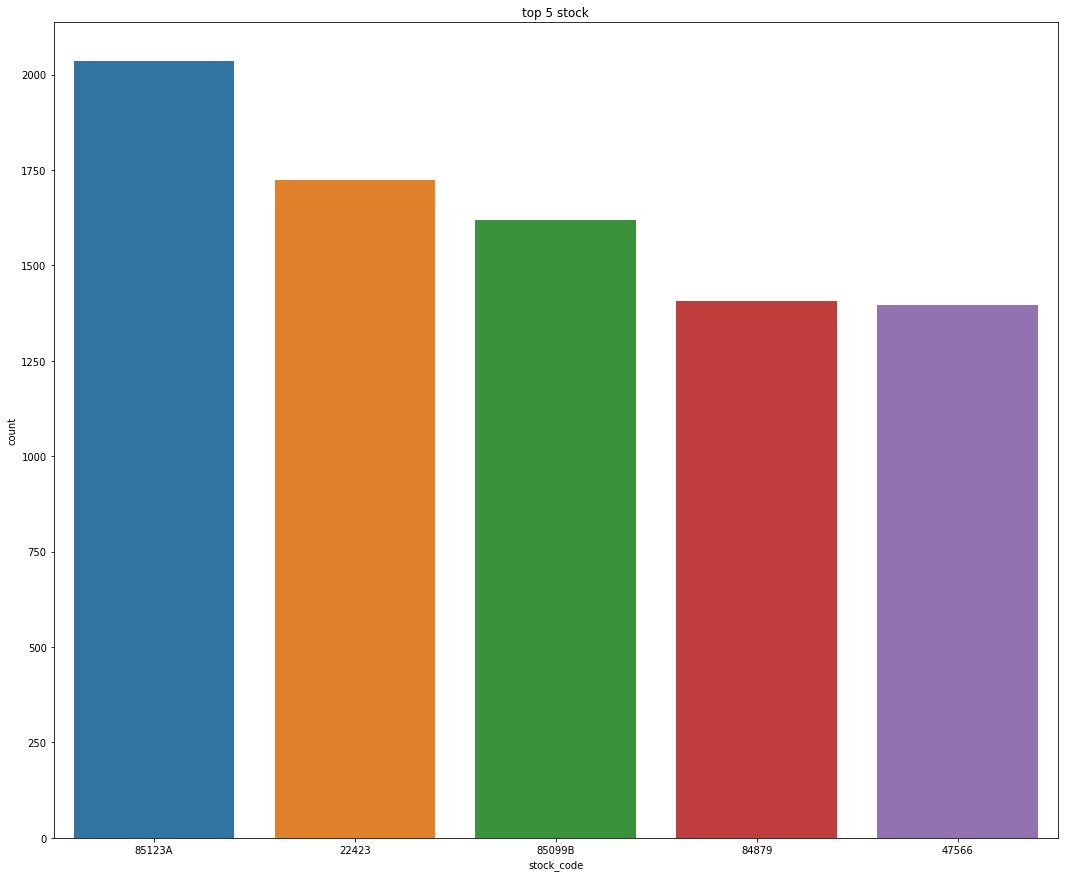

In [222]:
plt.figure(figsize=(18,15))
plt.title('top 5 stock')
sns.barplot(x='stock_code',y='count',data=stock_df[:5])

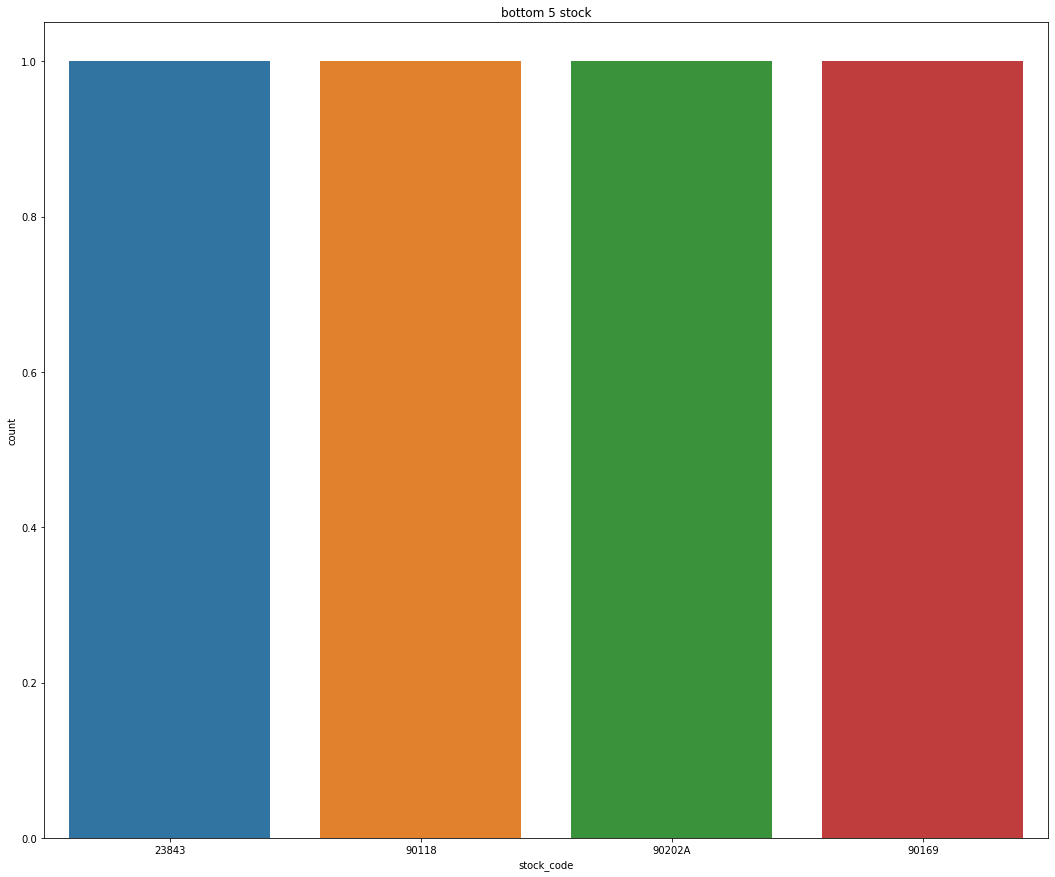

In [223]:
plt.figure(figsize=(18,15))
plt.title('bottom 5 stock')
sns.barplot(x='stock_code',y='count',data=stock_df[-1:-5:-1])

In [224]:
country_df=df['Country'].value_counts().reset_index()

In [225]:
country_df

,index,Country
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1462
9,Australia,1185


In [226]:
country_df.rename(columns={'index':'country'},inplace=True)
country_df.rename(columns={'Country':'count'},inplace=True)

In [227]:
country_df

,country,count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1462
9,Australia,1185


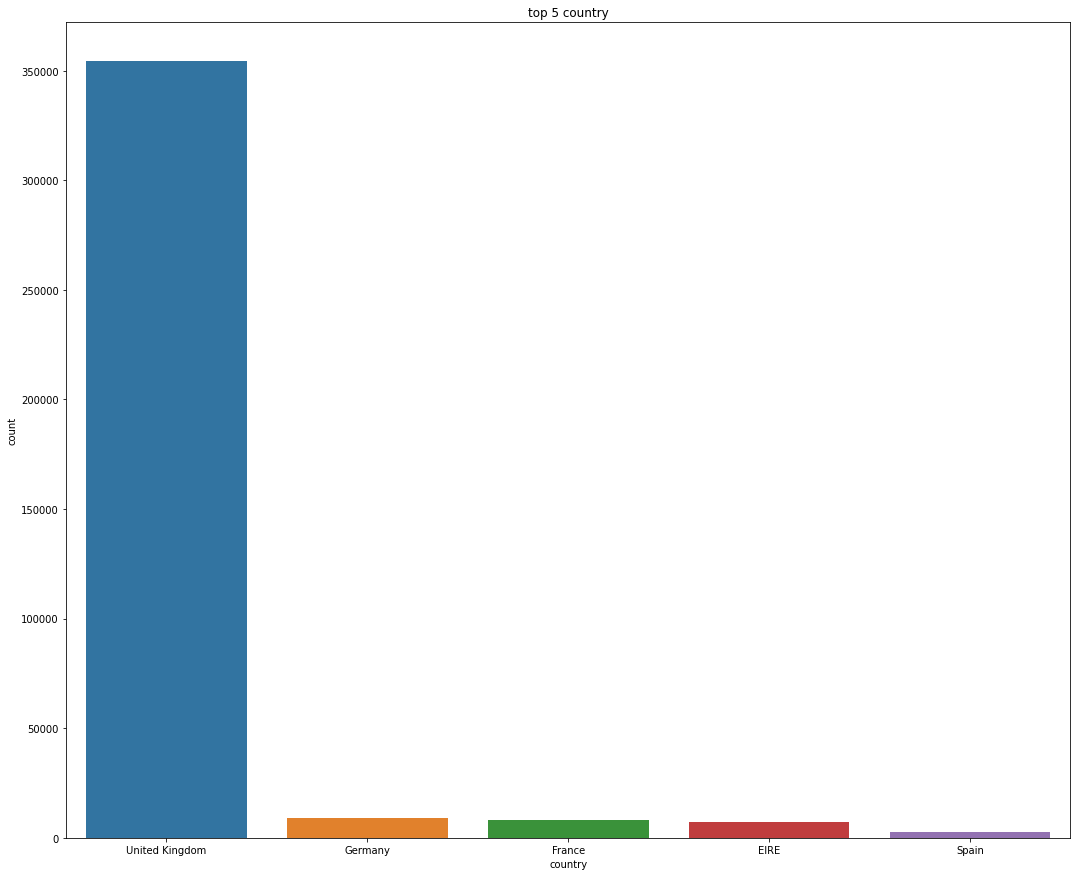

In [228]:
plt.figure(figsize=(18,15))
plt.title('top 5 country')
sns.barplot(x='country',y='count',data=country_df[:5])

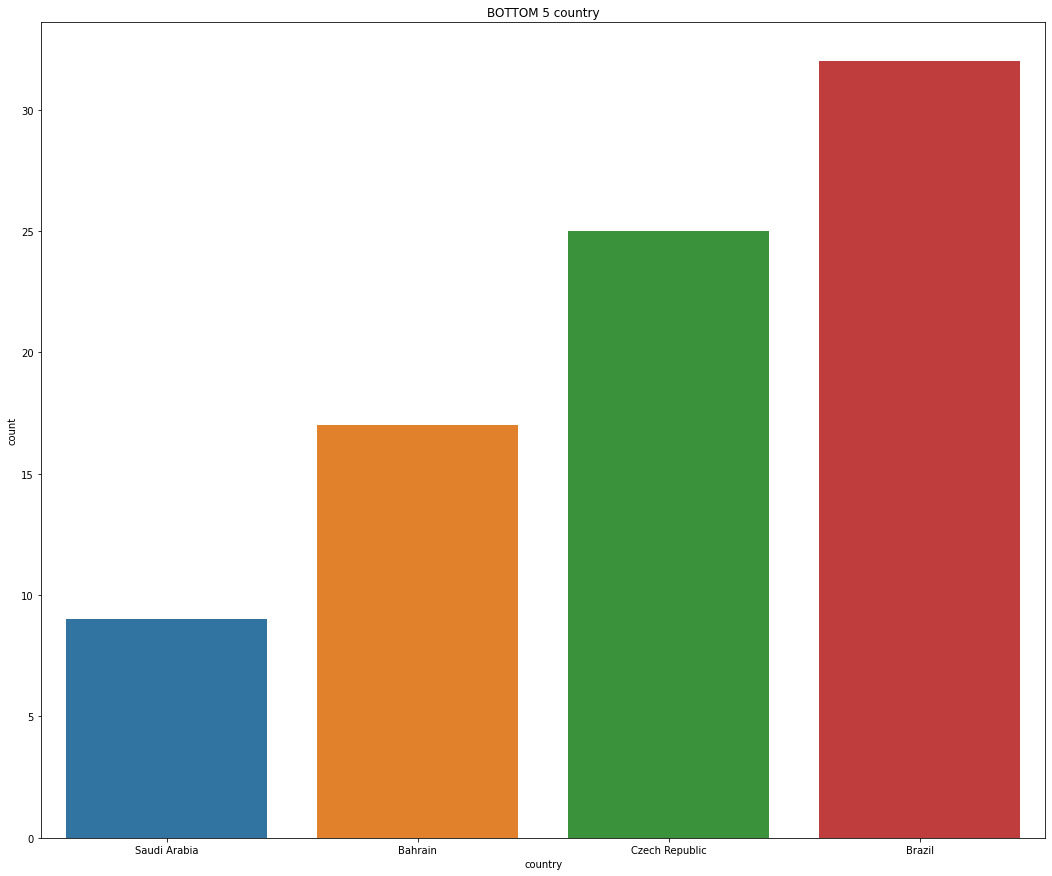

In [229]:
plt.figure(figsize=(18,15))
plt.title('BOTTOM 5 country')
sns.barplot(x='country',y='count',data=country_df[-1:-5:-1])

In [230]:
df_new=df[['StockCode','Description']]

In [231]:
df_new.groupby('StockCode')['Description'].nunique().reset_index().sort_values(by='Description',ascending=False)

,StockCode,Description
2026,23196,4
2066,23236,4
1957,23126,3
2205,23396,3
2341,23535,3
...,...,...
1230,22355,1
1231,22356,1
1232,22357,1
1233,22358,1


In [232]:
df_new

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS
541905,22899,CHILDREN'S APRON DOLLY GIRL
541906,23254,CHILDRENS CUTLERY DOLLY GIRL
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE


In [233]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [234]:
columns=['Quantity','UnitPrice']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


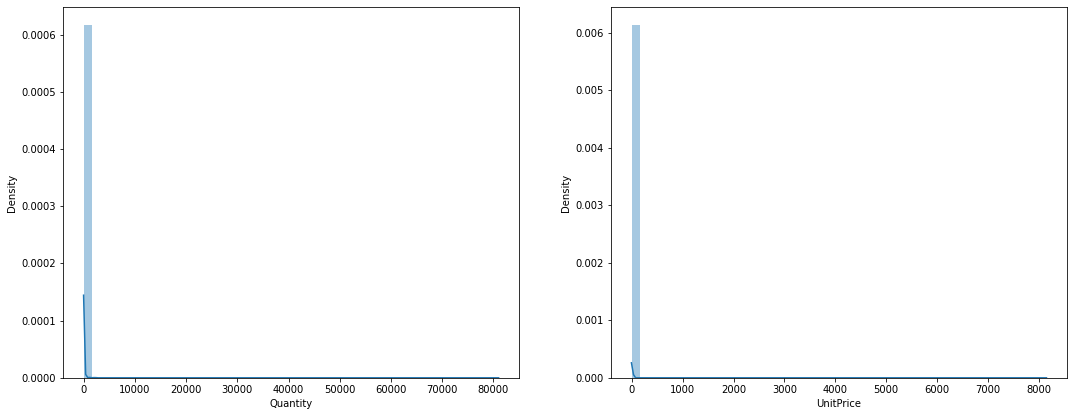

In [235]:
plt.figure(figsize=(18,15))
for i,j in enumerate(columns):
  plt.subplot(2,2,i+1)
  sns.distplot(df[j])



In [236]:
#for i in columns:
  #df[i]=np.log(df[i])

In [237]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [238]:
#plt.figure(figsize=(18,15))
#for i,j in enumerate(columns):
 # plt.subplot(2,2,i+1)
  #sns.distplot(df[j])

In [239]:
from datetime import datetime

In [240]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [241]:
df["InvoiceDate"].astype('str')

0         2010-12-01 08:26:00
1         2010-12-01 08:26:00
2         2010-12-01 08:26:00
3         2010-12-01 08:26:00
4         2010-12-01 08:26:00
                 ...         
541904    2011-12-09 12:50:00
541905    2011-12-09 12:50:00
541906    2011-12-09 12:50:00
541907    2011-12-09 12:50:00
541908    2011-12-09 12:50:00
Name: InvoiceDate, Length: 397924, dtype: object

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [243]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"],format="%Y-%m-%d %H:%M")

In [244]:
df['InvoiceDate'].reset_index()

,index,InvoiceDate
0,0,2010-12-01 08:26:00
1,1,2010-12-01 08:26:00
2,2,2010-12-01 08:26:00
3,3,2010-12-01 08:26:00
4,4,2010-12-01 08:26:00
...,...,...
397919,541904,2011-12-09 12:50:00
397920,541905,2011-12-09 12:50:00
397921,541906,2011-12-09 12:50:00
397922,541907,2011-12-09 12:50:00


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [246]:
df['day_name']=df['InvoiceDate'].dt.day_name()

In [247]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday


In [248]:
df['year']=df['InvoiceDate'].dt.year

In [249]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_name,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010


In [250]:
df['month']=df['InvoiceDate'].apply(lambda x:x.month)

In [251]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_name,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12


In [252]:
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [253]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_name,year,month,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26


In [254]:
df['total_amount']=df['Quantity']*df['UnitPrice']

In [255]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_name,year,month,hour,minute,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26,20.34


In [256]:
df['month_name']=df['InvoiceDate'].dt.month_name()

In [257]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_name,year,month,hour,minute,total_amount,month_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,8,26,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,8,26,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26,20.34,December


In [258]:
day_name_df=df['day_name'].value_counts().reset_index()

In [259]:
day_name_df

,index,day_name
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


In [260]:
day_name_df.rename(columns={'index':'dayname'},inplace=True)
day_name_df.rename(columns={'day_name':'count'},inplace=True)


In [261]:
day_name_df

,dayname,count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


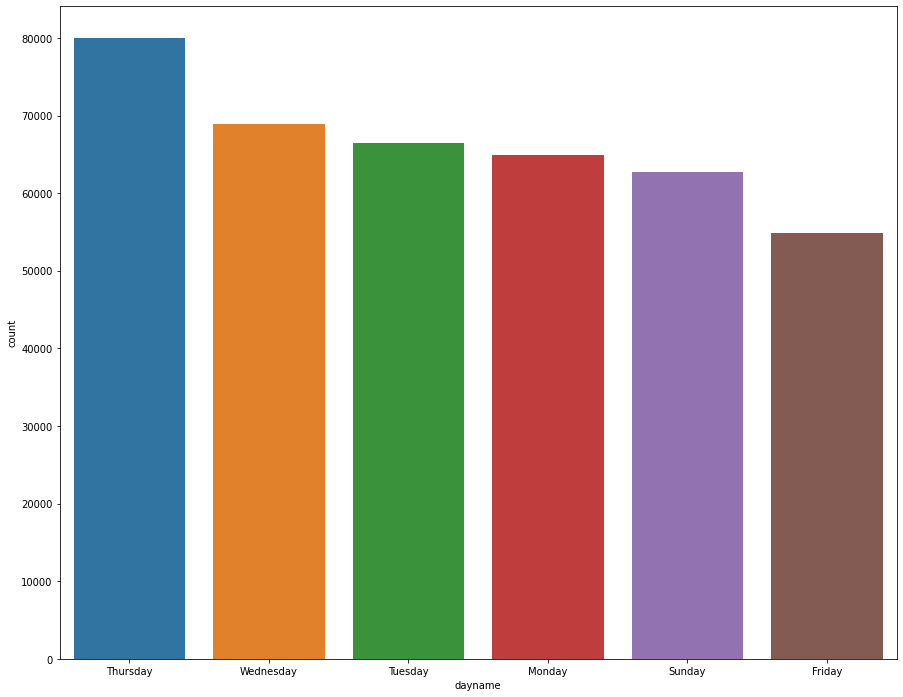

In [263]:
plt.figure(figsize=(15,12))
sns.barplot(x='dayname',y='count',data=day_name_df)

In [264]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_name,year,month,hour,minute,total_amount,month_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,8,26,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26,20.34,December


In [265]:
month_name_df=df['month_name'].value_counts().reset_index()
month_name_df

,index,month_name
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


In [266]:
month_name_df.rename(columns={'index':'month'},inplace=True)
month_name_df.rename(columns={'month_name':'count'},inplace=True)

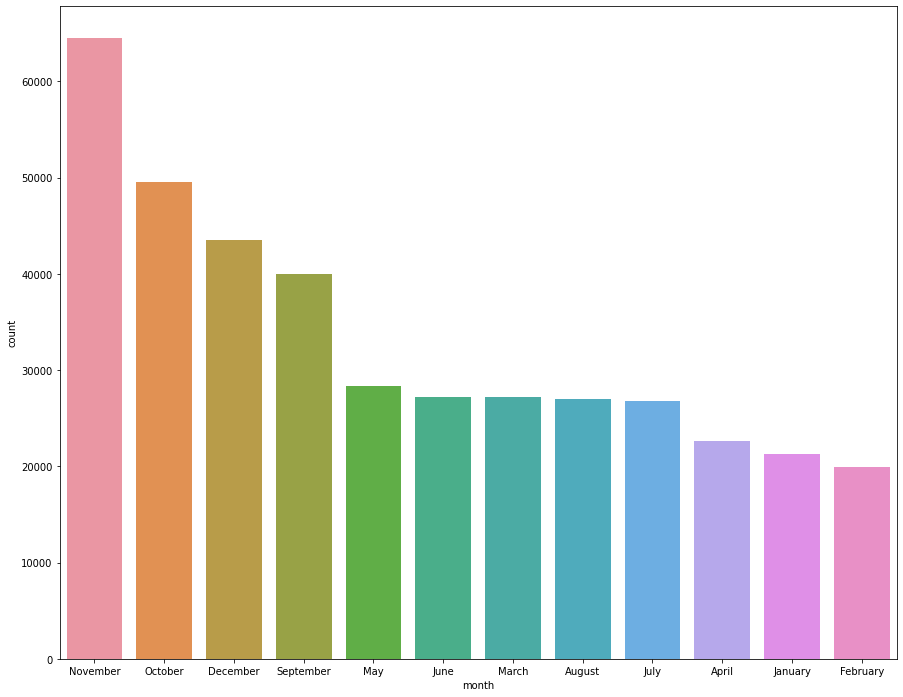

In [268]:
plt.figure(figsize=(15,12))
sns.barplot(x='month',y='count',data=month_name_df)

In [270]:
year_df=df['year'].value_counts().reset_index()
year_df

,index,year
0,2011,371764
1,2010,26160


In [271]:
year_df.rename(columns={'index':'year_sale'},inplace=True)
year_df.rename(columns={'year':'count'},inplace=True)

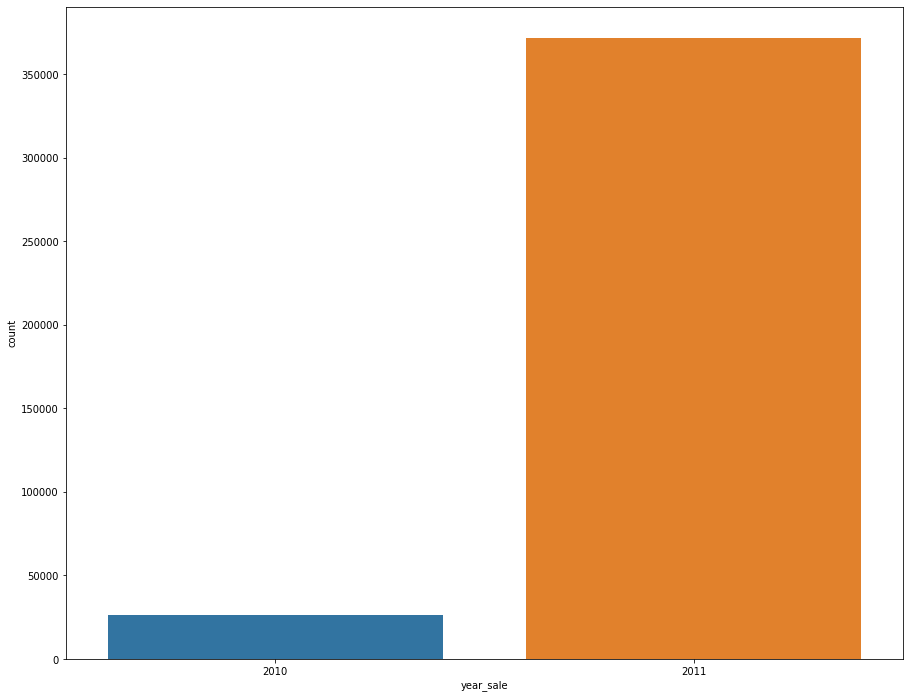

In [272]:
plt.figure(figsize=(15,12))
sns.barplot(x='year_sale',y='count',data=year_df)

In [273]:
hours_df=df['hour'].value_counts().reset_index()

In [274]:
hours_df

,index,hour
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


In [275]:
hours_df.rename(columns={'index':'hour_time','hour':'count'},inplace=True)

In [276]:
hours_df

,hour_time,count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


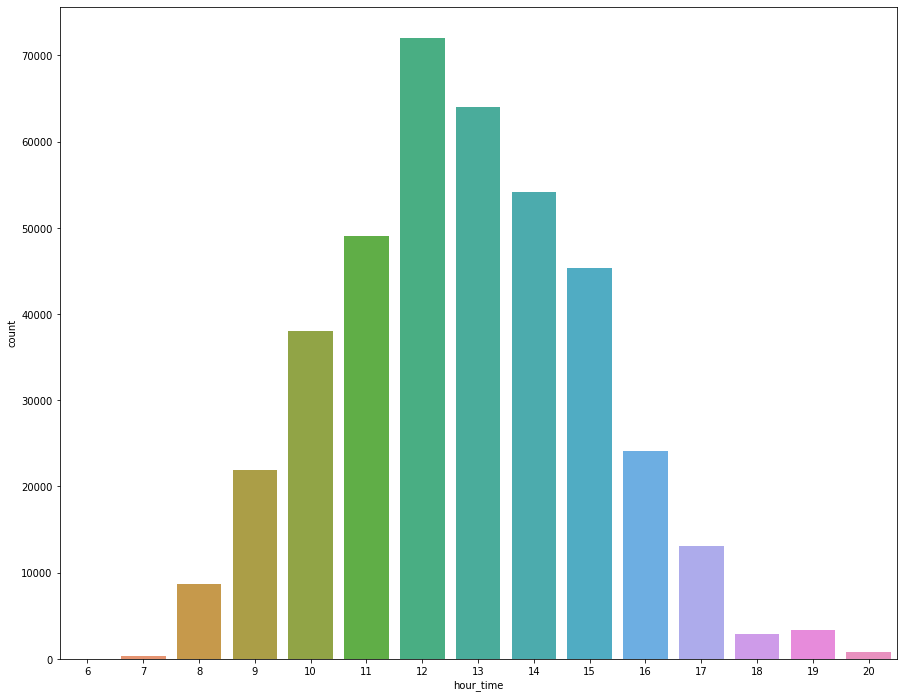

In [277]:
plt.figure(figsize=(15,12))
sns.barplot(x='hour_time',y='count',data=hours_df)

In [278]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [279]:
df['Time_type']=df['hour'].apply(time_type)

In [280]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_name,year,month,hour,minute,total_amount,month_name,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,8,26,15.30,December,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26,20.34,December,Morning


In [283]:
time_df=df['Time_type'].value_counts().reset_index()

In [284]:
time_df.rename(columns={'index':'time_type','Time_type':'count'},inplace=True)


In [285]:
time_df

,time_type,count
0,Afternoon,272764
1,Morning,118107
2,Evening,7053


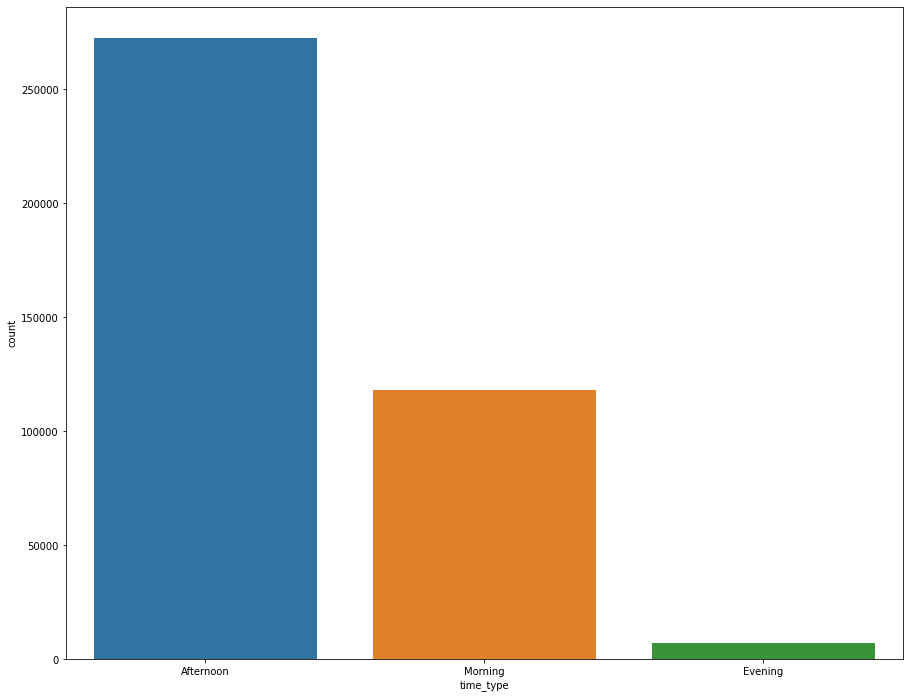

In [286]:
plt.figure(figsize=(15,12))
sns.barplot(x='time_type',y='count',data=time_df)

### Create the RFM model (Recency, Frequency,Monetary value)

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on


Performing RFM Segmentation and RFM Analysis, Step by Step
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ... The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.

In [ ]:
# RECENCY : Days since the customer has made the latest transaction 
# FREQUENCY : Number of times the customer has made a transaction
# MONETARY VALUE : Total amount the customer has spent

In [287]:
# My latest transaction date is 09-12-2011
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [295]:
recency_df=df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

In [296]:
recency_df

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4334,18280.0,2011-03-07 09:52:00
4335,18281.0,2011-06-12 10:53:00
4336,18282.0,2011-12-02 11:43:00
4337,18283.0,2011-12-06 12:02:00


In [297]:
import datetime as dt
Latest_Date = dt.datetime(2011,12,10)
recency_df['Recency'] = Latest_Date - recency_df['InvoiceDate']

In [298]:
recency_df['Recency']

0      325 days 13:59:00
1        2 days 08:08:00
2       75 days 10:47:00
3       18 days 14:09:00
4      310 days 07:59:00
              ...       
4334   277 days 14:08:00
4335   180 days 13:07:00
4336     7 days 12:17:00
4337     3 days 11:58:00
4338    42 days 14:31:00
Name: Recency, Length: 4339, dtype: timedelta64[ns]

In [306]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'total_amount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'total_amount': 'Monetary'}, inplace=True)

In [307]:
rfm_df.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4334,18280.0,277,10,180.60
4335,18281.0,180,7,80.82
4336,18282.0,7,12,178.05
4337,18283.0,3,756,2094.88


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


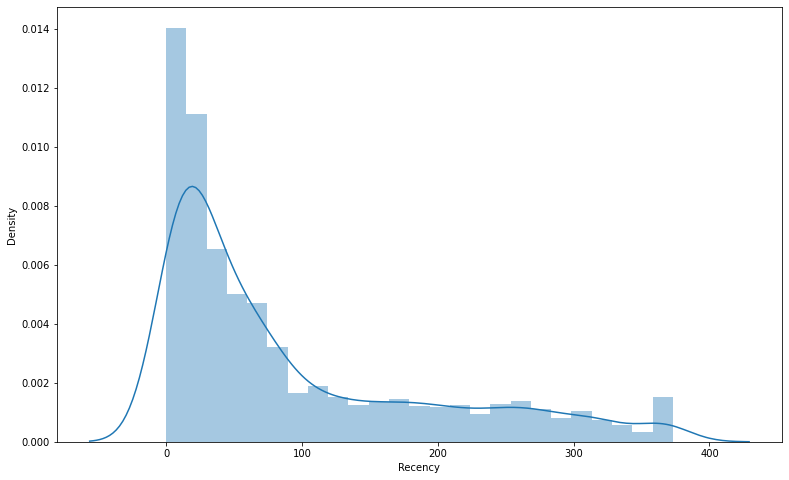

In [303]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


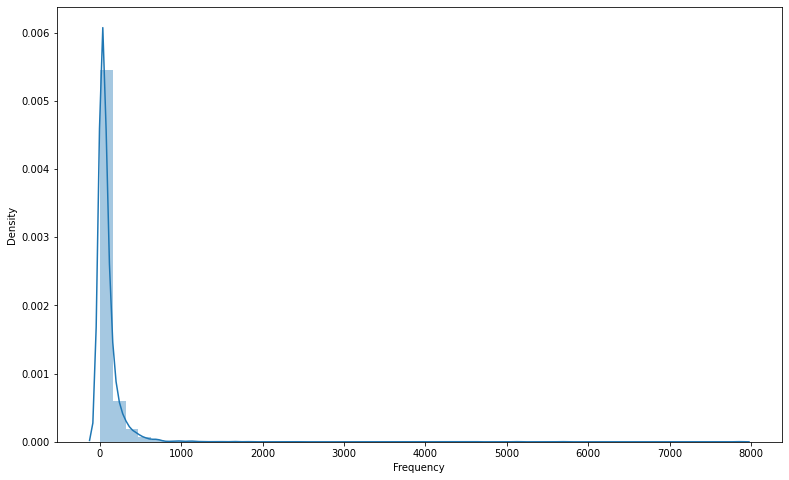

In [304]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


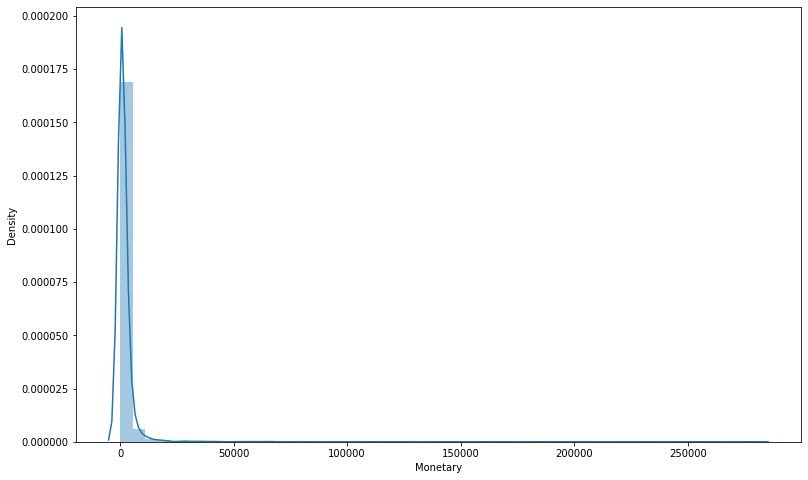

In [308]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [309]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [310]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}